In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
x = np.linspace(0., 4., 100)

In [3]:
def System(y,x):
    
    dydx = x + 2*y
    
    return dydx

In [4]:
def GetRungeKutta4(x,f,y0):
    
    h = x[1] - x[0]
    
    y = np.zeros_like(x)
    y[0] = y0
    for i in range(1,len(x)):
        
        k1 = f(y[i-1],x[i-1])
        k2 = f(y[i-1]+0.5*h,x[i-1] + 0.5*h*k1)
        k3 = f(y[i-1]+0.5*h,x[i-1] + 0.5*h*k2)
        k4 = f(y[i-1]+h,x[i-1] +h*k3)
        
        y[i] = y[i-1] + (h/6)*(k1+2*k2+2*k3+k4)

    return y

In [5]:
def GetAdams_4(f,x,yrk4):
    
    h = x[1] - x[0]
    
    y = yrk4.copy()
    
    yc = y.copy()
    
    for i in range(5,len(x)):
        
        y[i] = y[i-1] + (h/720)*( 1901*f(y[i-1],x[i-1]) - 2774*f(y[i-2],x[i-2]) + 2616*f(y[i-3],x[i-3]) - 1274*f(y[i-4],x[i-4]) + 251*f(y[i-5],x[i-5]))
        
        yc[i] = y[i]
        
        
        # Moulton 5 orden
        yc[i] = yc[i-1] + (h/1440)*(475*f(y[i],x[i]) + 1427*f(y[i-1],x[i-1]) - 798*f(y[i-2],x[i-2]) + 482*f(y[i-3],x[i-3]) - 173*f(y[i-4],x[i-4]) + 27*f(y[i-5],x[i-5]))
        
    
    return y,yc

In [6]:
y0 = 0

yrk4 = GetRungeKutta4(x,System,y0)

ybash4, ymoulton5 = GetAdams_4(System,x,yrk4)

In [7]:
def Solucion(x):
    y = -x/2 - (1-np.exp(2*x))/4
    
    return y

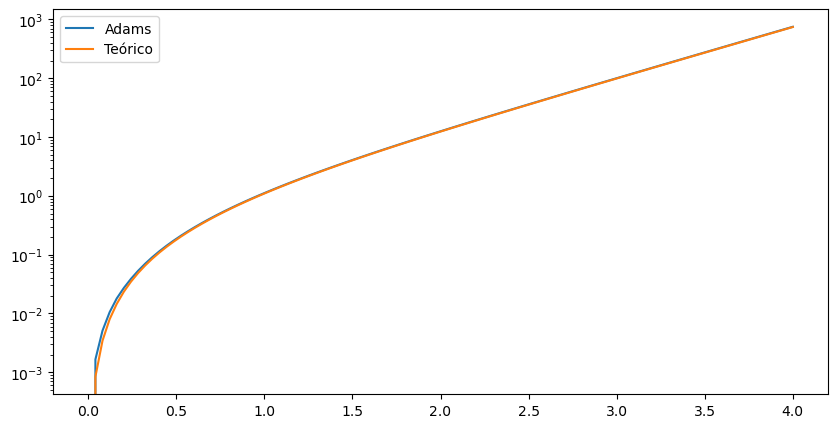

In [11]:
yteo = Solucion(x)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.yscale("log")
ax.plot(x, ymoulton5, label = "Adams")
ax.plot(x, yteo, label = "Teórico")
plt.legend()